In [414]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [415]:
teams = pd.read_csv("teams.csv")

In [416]:
teams

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0
...,...,...,...,...,...,...,...,...,...
2009,ZIM,2000,26,19,25.0,179.0,71.1,0.0,0
2010,ZIM,2004,14,11,25.1,177.8,70.5,0.0,3
2011,ZIM,2008,16,15,26.1,171.9,63.7,3.0,4
2012,ZIM,2012,9,8,27.3,174.4,65.2,4.0,0


In [417]:
train, test = train_test_split(teams, test_size=0.2, random_state=1)

In [418]:
predictors = ["athletes", "events"]
target = "medals"

In [419]:
X = train[predictors].copy()
y = train[[target]].copy()

In [420]:
X

,athletes,events
1322,6,6
1872,119,80
953,4,4
1117,2,2
1993,43,25
...,...,...
1791,40,25
1096,36,23
1932,719,245
235,13,11


In [421]:
y

,medals
1322,0
1872,5
953,0
1117,0
1993,0
...,...
1791,1
1096,1
1932,264
235,0


In [422]:
x_mean = X.mean()
x_std = X.std()

In [423]:
x_mean

athletes    74.409063
events      35.990068
dtype: float64

In [424]:
X = (X - x_mean) / x_std

In [425]:
X.describe()

,athletes,events
count,1.611000e+03,1.611000e+03
mean,-2.370681e-17,-9.923781e-18
std,1.000000e+00,1.000000e+00
min,-5.768883e-01,-7.143930e-01
25%,-5.297371e-01,-6.123079e-01
50%,-4.197174e-01,-4.489717e-01
75%,-2.679027e-02,1.839560e-01
max,6.008571e+00,4.634867e+00


In [426]:
X["intercept"] = 1

In [427]:
X = X[["intercept"] + predictors]

In [428]:
X.describe()

,intercept,athletes,events
count,1611.0,1.611000e+03,1.611000e+03
mean,1.0,-2.370681e-17,-9.923781e-18
std,0.0,1.000000e+00,1.000000e+00
min,1.0,-5.768883e-01,-7.143930e-01
25%,1.0,-5.297371e-01,-6.123079e-01
50%,1.0,-4.197174e-01,-4.489717e-01
75%,1.0,-2.679027e-02,1.839560e-01
max,1.0,6.008571e+00,4.634867e+00


In [429]:
X.T

,1322,1872,953,1117,1993,385,1287,1831,0,1159,...,960,847,1669,715,905,1791,1096,1932,235,1061
intercept,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
athletes,-0.537596,0.350420,-0.553313,-0.569030,-0.246829,-0.482586,-0.537596,0.138239,-0.521879,-0.152527,...,-0.199678,-0.160386,-0.529737,-0.529737,-0.341132,-0.270405,-0.301839,5.065546,-0.482586,-0.191820
events,-0.612308,0.898552,-0.653142,-0.693976,-0.224384,-0.571474,-0.612308,0.102288,-0.571474,-0.163133,...,-0.285636,-0.101882,-0.612308,-0.591891,-0.367304,-0.224384,-0.265219,4.267361,-0.510223,0.041037


In [430]:
alpha = 2
I = np.identity(X.shape[1])

In [431]:
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [432]:
I [0] [0] = 0

In [433]:
I

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [434]:
penalty = alpha * I

In [435]:
penalty

array([[0., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [436]:
B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y

In [437]:
B

,medals
0,10.691496
1,61.857734
2,-34.632920


In [438]:
B.index = ["intercept", "athletes", "events"]

In [439]:
B

,medals
intercept,10.691496
athletes,61.857734
events,-34.632920


In [440]:
test_X = test[predictors]
test_X = (test_X - x_mean) / x_std
test_X["intercept"] = 1
test_X = test_X[["intercept"] + predictors]

In [441]:
test_X

,intercept,athletes,events
309,1,-0.553313,-0.653142
285,1,0.594035,1.000637
919,1,-0.144668,0.102288
120,1,0.146098,0.531045
585,1,-0.301839,-0.122299
...,...,...,...
541,1,-0.380425,-0.408138
1863,1,-0.191820,0.143122
622,1,-0.058224,0.388126
1070,1,-0.569030,-0.693976


In [442]:
predictions = test_X @ B

In [443]:
predictions

,medals
309,-0.914959
285,12.782156
919,-1.799893
120,1.337116
585,-3.744014
...,...
541,1.294285
1863,-6.130765
622,-6.352080
1070,-0.472980


In [444]:
def ridge_fit(train, predictors, target, alpha):
    X = train[predictors].copy()
    y = train[[target]].copy()
    
    x_mean = X.mean()
    x_std = X.std()
    
    X = (X - x_mean) / x_std
    X["intercept"] = 1
    X = X[["intercept"] + predictors]
    
    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0
    
    B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
    B.index = ["intercept", "athletes", "events"]
    return B, x_mean, x_std

In [445]:
B, x_mean, x_std = ridge_fit(train, predictors, target, alpha)

In [446]:
def ridge_predict(test, predictors, x_mean, x_std, B):
    test_X = test[predictors]
    test_X = (test_X - x_mean) / x_std
    test_X["intercept"] = 1
    test_X = test_X[["intercept"] + predictors]

    predictions = test_X @ B
    return predictions

In [447]:
predictions = ridge_predict(test, predictors, x_mean, x_std, B)

In [448]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=alpha)

In [449]:
ridge.fit(X[predictors], y)

Ridge(alpha=2)

In [450]:
ridge.coef_

array([[ 61.85773366, -34.63292036]])

In [451]:
ridge.intercept_

array([10.69149597])

In [452]:
sklearn_predictions = ridge.predict(test_X[predictors])

In [453]:
predictions - sklearn_predictions

,medals
309,-6.339373e-14
285,3.019807e-14
919,-3.952394e-14
120,-1.287859e-14
585,-5.284662e-14
...,...
541,-5.084821e-14
1863,-4.884981e-14
622,-4.263256e-14
1070,-6.966649e-14


In [454]:
from sklearn.metrics import mean_absolute_error

errors = []
alphas = [10**i for i in range(-2,4)]

In [455]:
alphas

[0.01, 0.1, 1, 10, 100, 1000]

In [456]:
for alpha in alphas:
    B, x_mean, x_std = ridge_fit(train, predictors, target, alpha)
    predictions = ridge_predict(test, predictors, x_mean, x_std, B)
    
    errors.append(mean_absolute_error(test[target], predictions))

In [457]:
errors

[6.3096408301611415,
 6.306044331952951,
 6.272283376431574,
 6.114051204717714,
 7.156811236590451,
 6.97805458957573]

In [458]:
alphas

[0.01, 0.1, 1, 10, 100, 1000]

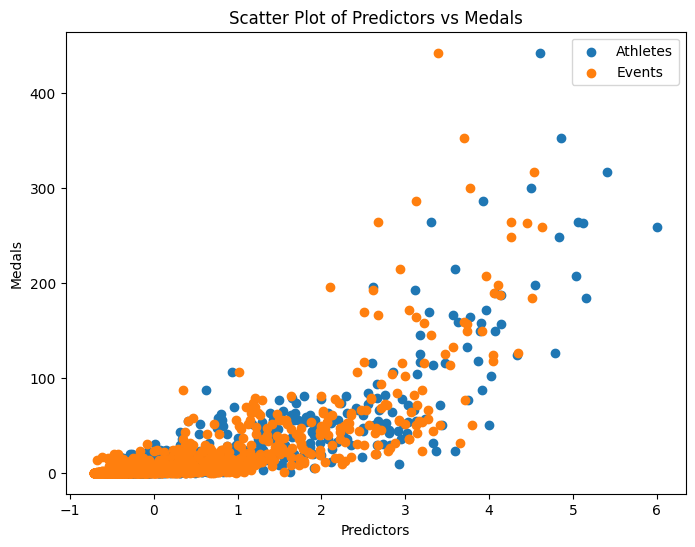

In [459]:
plt.figure(figsize=(8, 6)) 
plt.scatter(X['athletes'], y, label='Athletes')
plt.scatter(X['events'], y, label='Events')
plt.xlabel('Predictors')
plt.ylabel('Medals')
plt.title('Scatter Plot of Predictors vs Medals')
plt.legend()
plt.show()

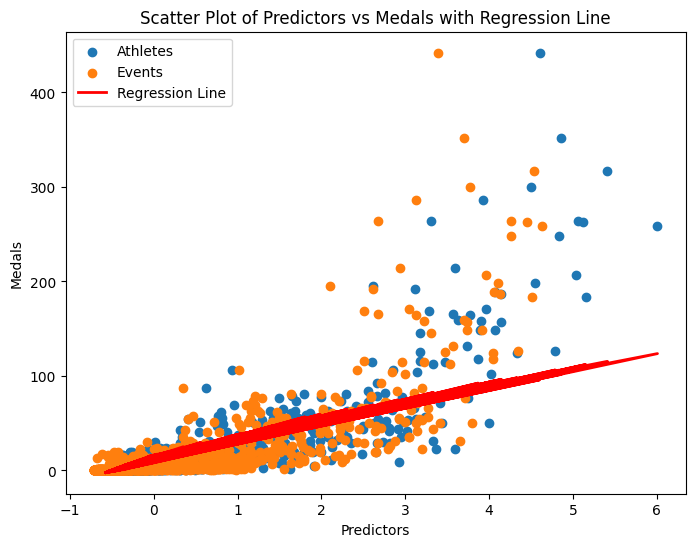

In [460]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=alpha)
ridge.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X['athletes'], y, label='Athletes')
plt.scatter(X['events'], y, label='Events')
plt.plot(X['athletes'], ridge.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Predictors')
plt.ylabel('Medals')
plt.title('Scatter Plot of Predictors vs Medals with Regression Line')
plt.legend()
plt.show()